# Import Libraries

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import pickle
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

# Dataset Description
The data is taken from "https://www.kaggle.com/mathchi/diabetes-data-set"

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.All the patients here are female 21 years or older.It contains the following columns:

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

# Objectives
Clean the data and deal with missing values 

Perform EDA to get a better understanding of underlying trends

Fit different models and tune their hyperparameter for best performance

# Data Cleaning

In [14]:
data=pd.read_csv('diabetes.csv')

In [15]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### observation
We note that minimum value for columns such as Glucose,BP,Insulin,BMI are 0 which is not possible , hence these must be missing values which are encoded as 0 We can use imputation techniques to deal with these

In [20]:
corrupted_data=data.loc[:,'Glucose':'BMI']
corrupted_data.replace(0,np.nan,inplace=True)
data.loc[:,'Glucose':'BMI']=corrupted_data

In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Lets observe these missing values more closely and find out if their is any relation

In [27]:
import missingno as msno

<AxesSubplot:>

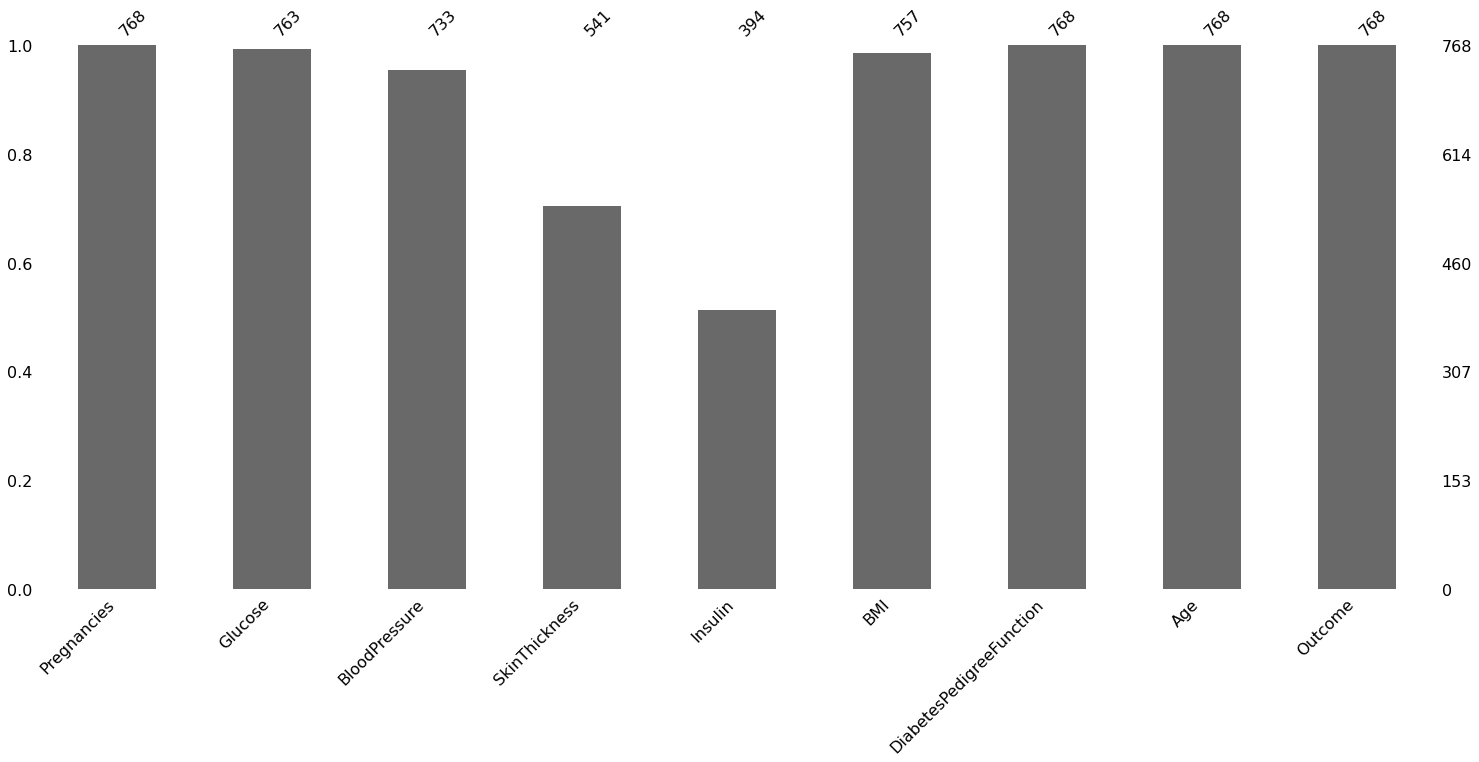

In [28]:
msno.bar(data)

<AxesSubplot:>

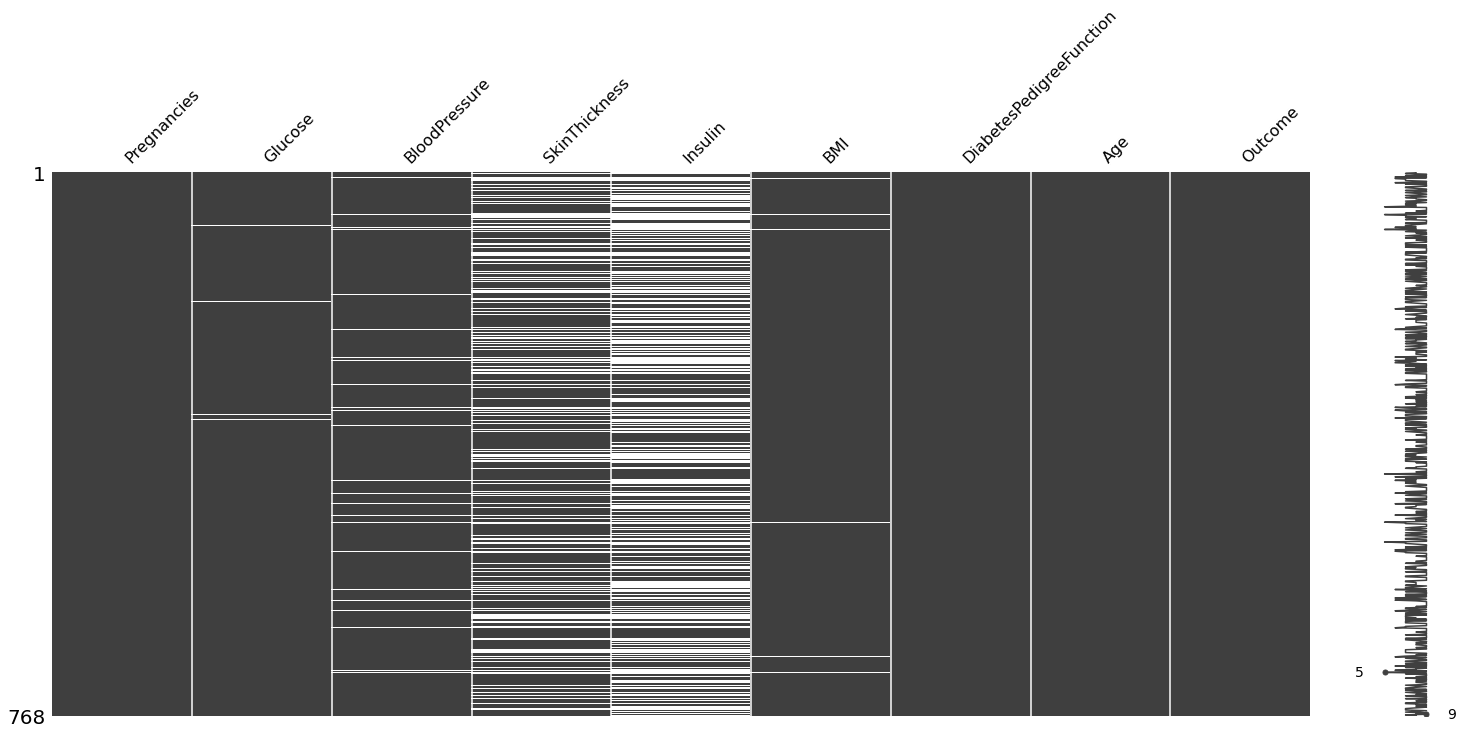

In [29]:
msno.matrix(data)

<AxesSubplot:>

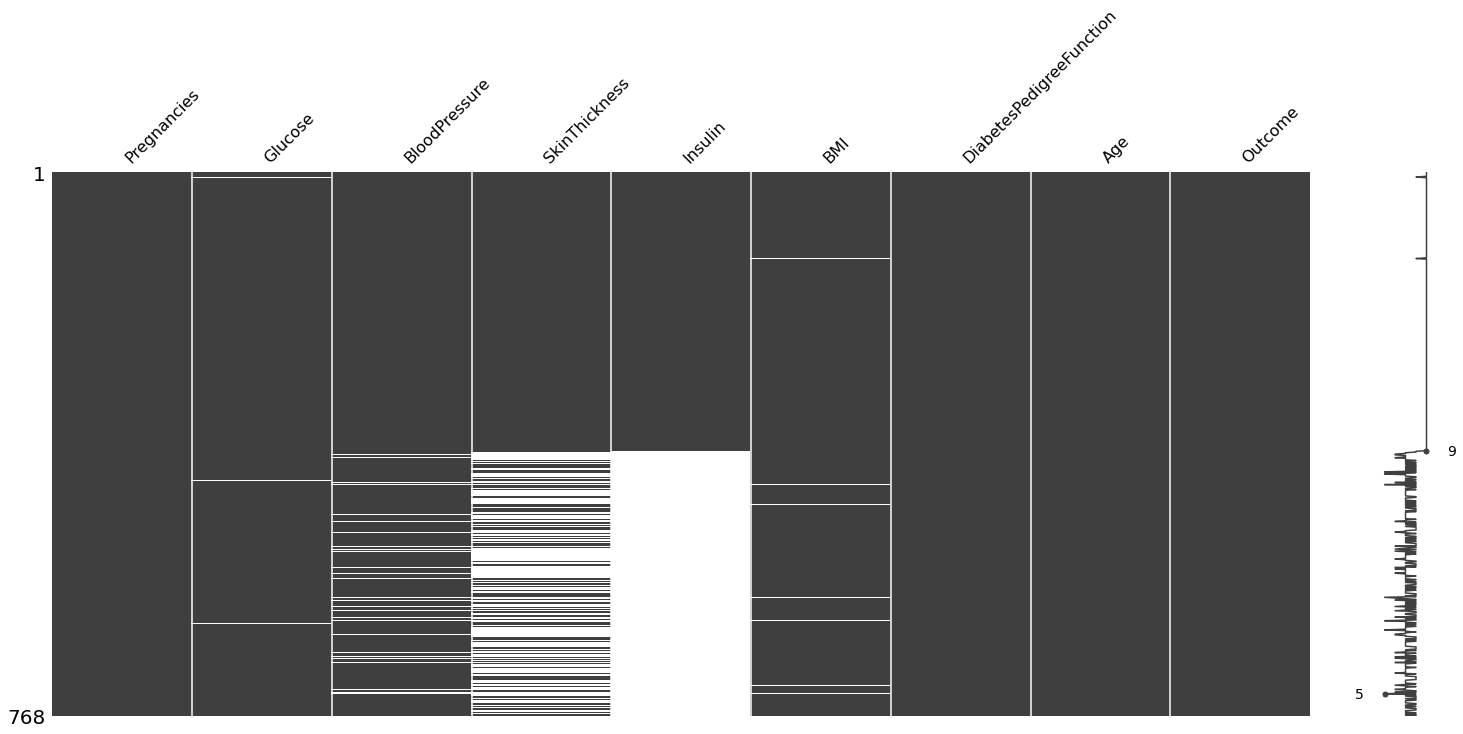

In [30]:
msno.matrix(data.sort_values(by="Insulin"))

Looking at the above matrix we can figure out that glucose and BMI are MCAR(Missing completely at random) and insulin , SkinThickness are MNAR(Missing not at random)

<AxesSubplot:>

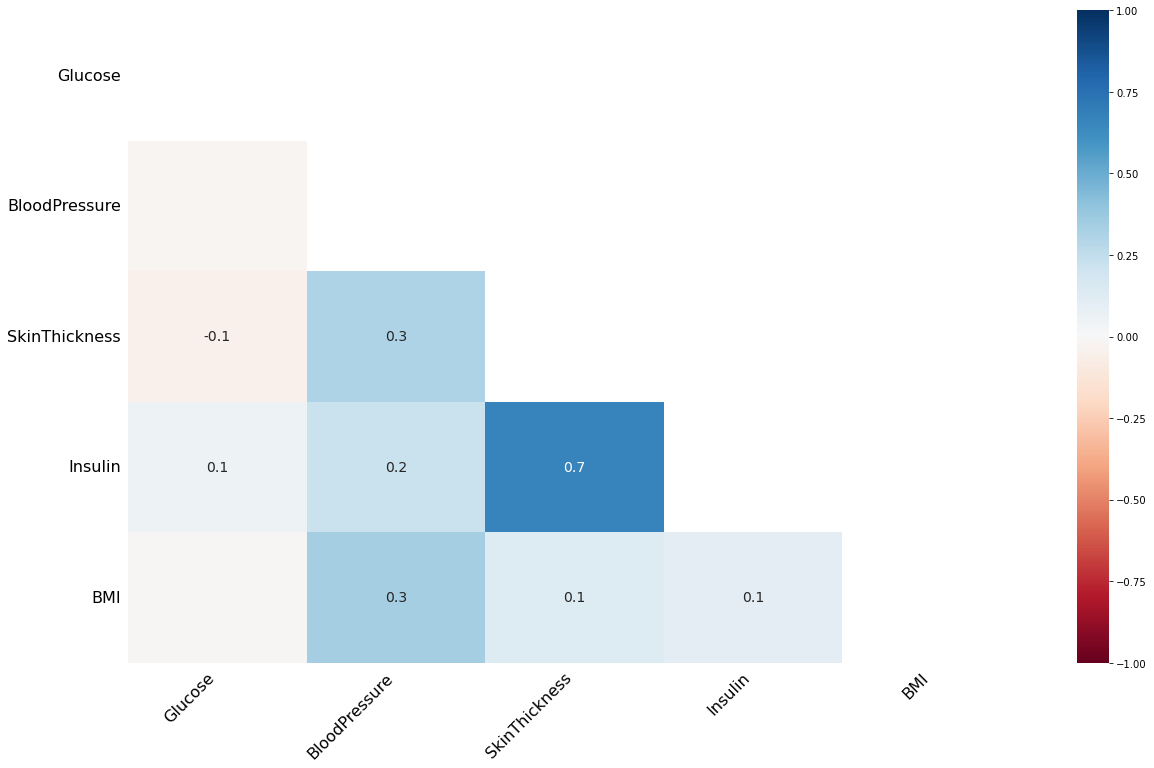

In [31]:
msno.heatmap(data)

We can see heavy correlation between SkinThickness and Insulin


In [32]:
# drop rows having missing values for Glucose or BMI
data.dropna(subset=['Glucose','BMI'],inplace=True)

In [33]:
data_knn=data.copy()
knn_imputer=KNNImputer(n_neighbors=5)
data_knn.iloc[:]=knn_imputer.fit_transform(data_knn)

Using knnimputer we fill the missing values without impacting the variability of the dataset


In [34]:
data_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.413830,29.102128,154.656649,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.223965,9.473877,98.872359,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,90.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,135.000000,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,34.650000,191.850000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## outlier removal

In [35]:
cleaned_data=data_knn

<AxesSubplot:xlabel='Pregnancies'>

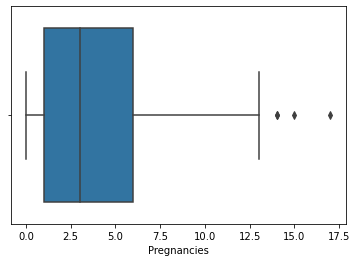

In [36]:
sns.boxplot(data=data_knn,x='Pregnancies')

value above 13 is outlier

In [37]:
cleaned_data=cleaned_data[cleaned_data['Pregnancies']<=13]

<AxesSubplot:xlabel='Glucose'>

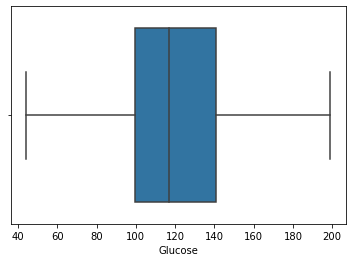

In [38]:
sns.boxplot(data=data_knn,x='Glucose')

there is no outlier

<AxesSubplot:xlabel='BloodPressure'>

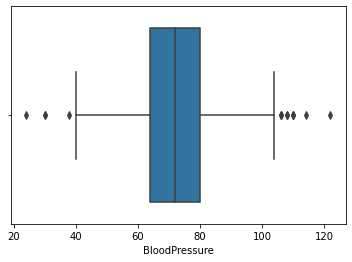

In [39]:
sns.boxplot(data=data_knn,x='BloodPressure')

outlier below 30 and above 110

In [40]:
cleaned_data=cleaned_data[cleaned_data['BloodPressure']>=30]
cleaned_data=cleaned_data[cleaned_data['BloodPressure']<=110]

<AxesSubplot:xlabel='SkinThickness'>

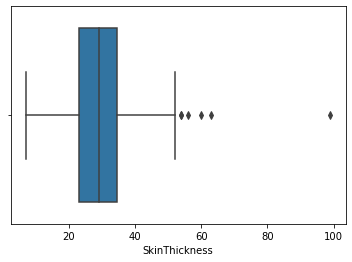

In [41]:
sns.boxplot(data=data_knn,x='SkinThickness')

outlier above 70

In [42]:
cleaned_data=cleaned_data[cleaned_data['SkinThickness']<=70]

<AxesSubplot:xlabel='Insulin'>

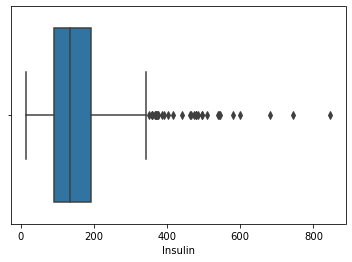

In [43]:
sns.boxplot(data=data_knn, x='Insulin')

outlier above 500

In [44]:
cleaned_data=cleaned_data[cleaned_data['Insulin']<=500]

<AxesSubplot:xlabel='Age'>

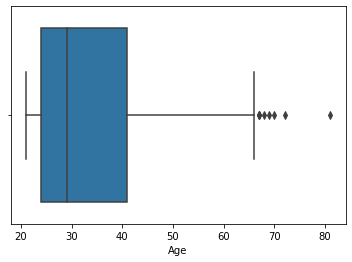

In [45]:
sns.boxplot(data=data_knn,x='Age')

outlier above 75

In [46]:
cleaned_data=cleaned_data[cleaned_data['Age']<=75]

### Exploratory Data Analysis

<AxesSubplot:>

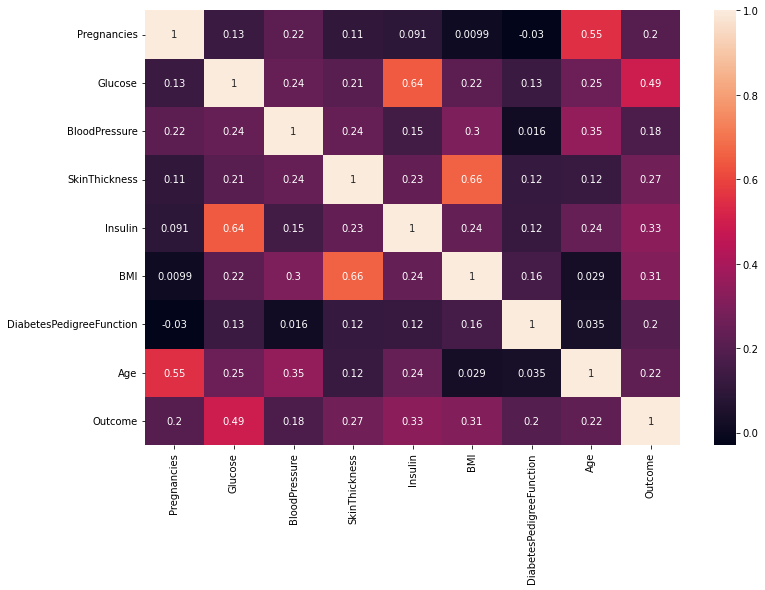

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_data.corr(),annot=True)

### The following conclusions can be drawn from the heatmap :

- There is not much correlation among different predictors
- Age and Pregnancy have a positive corr indicating that adults have more children
- There is positive correlation among Insulin and Glucose as well which could be explained by the      fact that perhaps the type 1 diabetic patients who generally have high Glucose , were given        Insulin injections.
- 

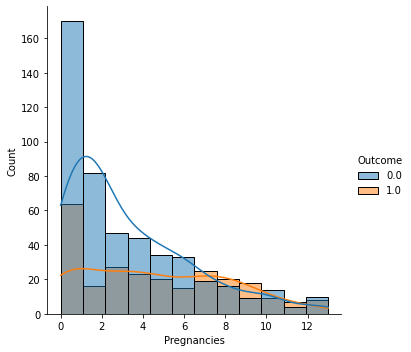

In [48]:
sns.displot(data=cleaned_data,x='Pregnancies',hue='Outcome',kde=True)

it seem number of pregnancy doesn't impact in output

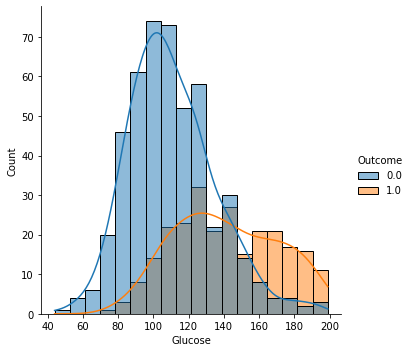

In [49]:
sns.displot(data=cleaned_data,x='Glucose', hue='Outcome',kde=True)

People who don't have diabeties have glucose normally distributed around 100 as mean , while those with diabeties have much higher level of glucose ranging between 100 and 200

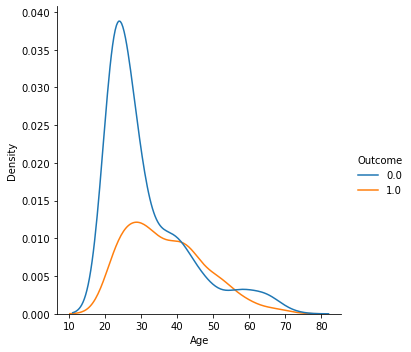

In [50]:
sns.displot(data=cleaned_data ,x='Age',hue='Outcome',kind='kde')

In [51]:
data_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


## Split Data for Training

In [52]:
X=cleaned_data.iloc[:,:-1]
y=cleaned_data.iloc[:,-1]

In [53]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [54]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42) 
#with stratify=True we get same proportion in our train test split as in our original dataset

# Classification Models

In [56]:
lj = LogisticRegression(solver="liblinear").fit(X_train,y_train)
gnb = GaussianNB().fit(X_train,y_train)
knnc = KNeighborsClassifier().fit(X_train,y_train)
cartc = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(X_train,y_train)
gbmc = GradientBoostingClassifier(verbose=False).fit(X_train,y_train)
catbc = CatBoostClassifier(verbose=False).fit(X_train,y_train)

In [57]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,catbc]
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(X_test)
    R2CV = cross_val_score(model,X_test,y_test,cv=10,verbose=False).mean()
    error = -cross_val_score(model,X_test,y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    roc = roc_curve(y_test,predict)
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(y_test,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("ROC-->",roc)
    print("-" * 30)


LogisticRegression: 
----------
ACC--> 0.7160493827160493
R2CV--> 0.716
MEAN SQUARED ERROR--> 0.532916503778969
ROC--> (array([0.    , 0.1625, 1.    ]), array([0.        , 0.48192771, 1.        ]), array([2., 1., 0.]))
------------------------------
GaussianNB: 
----------
ACC--> 0.7037037037037037
R2CV--> 0.7406666666666666
MEAN SQUARED ERROR--> 0.5092478113191389
ROC--> (array([0.  , 0.25, 1.  ]), array([0.        , 0.61445783, 1.        ]), array([2., 1., 0.]))
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.6748971193415638
R2CV--> 0.6628333333333334
MEAN SQUARED ERROR--> 0.5806605434043772
ROC--> (array([0.   , 0.225, 1.   ]), array([0.        , 0.48192771, 1.        ]), array([2., 1., 0.]))
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.6872427983539094
R2CV--> 0.679
MEAN SQUARED ERROR--> 0.5665686189686119
ROC--> (array([0.     , 0.23125, 1.     ]), array([0.        , 0.53012048, 1.        ]), array([2., 1., 0.]))
----------

best model is CatBoostClassifier

In [60]:
# saving trained model
filename = 'diabetes.sav'
pickle.dump(catbc, open(filename, 'wb'))